In [37]:
""" # Análise do Consumo de Energia no Brasil

## 1. Introdução
Breve contexto sobre a importância do consumo de energia no país.

## 2. Fonte dos Dados
Explicação sobre a origem dos dados (ONS), periodicidade, regiões.

## 3. Limpeza e Preparação dos Dados
- Tipos de dados
- Conversão de datas
- Tratamento de valores ausentes

## 4. Análise Exploratória
- Evolução do consumo ao longo do tempo
- Comparação por região
- Sazonalidade (ex: mais consumo no verão?)

## 5. Insights e Recomendações
- Quais regiões têm maior crescimento?
- Existe tendência de desaceleração?
- Sugestões com base nos dados

## 6. Conclusão
Resumo dos achados e ideias para análises futuras.
 """

' # Análise do Consumo de Energia no Brasil\n\n## 1. Introdução\nBreve contexto sobre a importância do consumo de energia no país.\n\n## 2. Fonte dos Dados\nExplicação sobre a origem dos dados (ONS), periodicidade, regiões.\n\n## 3. Limpeza e Preparação dos Dados\n- Tipos de dados\n- Conversão de datas\n- Tratamento de valores ausentes\n\n## 4. Análise Exploratória\n- Evolução do consumo ao longo do tempo\n- Comparação por região\n- Sazonalidade (ex: mais consumo no verão?)\n\n## 5. Insights e Recomendações\n- Quais regiões têm maior crescimento?\n- Existe tendência de desaceleração?\n- Sugestões com base nos dados\n\n## 6. Conclusão\nResumo dos achados e ideias para análises futuras.\n '

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import os

In [39]:
# Fazer o download
def downloadCargaHoraria(file):
  # URL do arquivo
  url = "https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/curva-carga-ho/"

  # Diretório de destino
  diretorio_destino = "../dados"

  # Criar a pasta se não existir
  os.makedirs(diretorio_destino, exist_ok=True)

  # caminho completo
  arquivo_local = os.path.join(diretorio_destino, file)

  response = requests.get(url + file)
  if response.status_code == 200:
      with open(arquivo_local, "wb") as file:
          file.write(response.content)
      print(f"Download concluído: {arquivo_local}")
  else:
      print(f"Erro ao baixar o arquivo. Código: {response.status_code}")


In [40]:
# Lista para armazenar os DataFrames de cada ano
dfs = []
# Download dos arquivos
for i in range(2020, 2026): 
  file = "CURVA_CARGA_" + str(i) + ".xlsx"
  print("Baixando demanda horária de ", i)
  downloadCargaHoraria(file)
  # Ler o arquivo e armazenar no DataFrame
  print(f"Lendo {file}...")
  diretorio_destino = "../dados"
  file_path = os.path.join(diretorio_destino, file)
  df = pd.read_excel(file_path, engine="openpyxl")

  # Adicionar uma coluna com o ano correspondente
  df["Ano"] = i  

  # Adicionar o DataFrame à lista
  dfs.append(df)

# Concatenar todos os DataFrames em um único
demanda = pd.concat(dfs, ignore_index=True)

print("Dados combinados com sucesso!")

Baixando demanda horária de  2020
Download concluído: ../dados\CURVA_CARGA_2020.xlsx
Lendo CURVA_CARGA_2020.xlsx...
Baixando demanda horária de  2021
Download concluído: ../dados\CURVA_CARGA_2021.xlsx
Lendo CURVA_CARGA_2021.xlsx...
Baixando demanda horária de  2022
Download concluído: ../dados\CURVA_CARGA_2022.xlsx
Lendo CURVA_CARGA_2022.xlsx...
Baixando demanda horária de  2023
Download concluído: ../dados\CURVA_CARGA_2023.xlsx
Lendo CURVA_CARGA_2023.xlsx...
Baixando demanda horária de  2024
Download concluído: ../dados\CURVA_CARGA_2024.xlsx
Lendo CURVA_CARGA_2024.xlsx...
Baixando demanda horária de  2025
Download concluído: ../dados\CURVA_CARGA_2025.xlsx
Lendo CURVA_CARGA_2025.xlsx...
Dados combinados com sucesso!


In [41]:
# Carregar o arquivo Excel
df = pd.read_excel('../dados/CURVA_CARGA_2025.xlsx', engine='openpyxl')

# Exibir as primeiras linhas do DataFrame
df.head()

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiahomwmed
0,N,NORTE,2025-01-01 00:00:00,7097.751
1,NE,NORDESTE,2025-01-01 00:00:00,12251.182
2,S,SUL,2025-01-01 00:00:00,10554.603
3,SE,SUDESTE,2025-01-01 00:00:00,35374.033
4,N,NORTE,2025-01-01 01:00:00,7053.337


In [42]:
demanda

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiahomwmed,Ano
0,N,NORTE,2020-01-01 00:00:00,4889.1460,2020
1,NE,NORDESTE,2020-01-01 00:00:00,9617.9750,2020
2,S,SUL,2020-01-01 00:00:00,10013.7420,2020
3,SE,SUDESTE,2020-01-01 00:00:00,33108.8615,2020
4,N,NORTE,2020-01-01 01:00:00,4953.3150,2020
...,...,...,...,...,...
185563,SE,SUDESTE,2025-04-16 22:00:00,46796.2970,2025
185564,N,NORTE,2025-04-16 23:00:00,9084.0310,2025
185565,NE,NORDESTE,2025-04-16 23:00:00,15450.6610,2025
185566,S,SUL,2025-04-16 23:00:00,13226.4430,2025


In [43]:
# Informações gerais sobre o DataFrame
demanda.info()

# Verificar a presença de valores nulos
demanda.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185568 entries, 0 to 185567
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id_subsistema            185568 non-null  object        
 1   nom_subsistema           185568 non-null  object        
 2   din_instante             185568 non-null  datetime64[ns]
 3   val_cargaenergiahomwmed  185568 non-null  float64       
 4   Ano                      185568 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 7.1+ MB


id_subsistema              0
nom_subsistema             0
din_instante               0
val_cargaenergiahomwmed    0
Ano                        0
dtype: int64

In [44]:
# converte a coluna de data
demanda['din_instante'] = pd.to_datetime(demanda['din_instante'])

In [45]:
# media por subsistema

# media diaria
media_diaria = (
    demanda
    .groupby([demanda["din_instante"].dt.date, "id_subsistema"])["val_cargaenergiahomwmed"]
    .mean()
    .reset_index()
    .rename(columns={"din_instante": "data", "val_cargaenergiahomwmed": "media_diaria"})
)

# media mensal
media_mensal = (
    demanda
    .groupby([demanda["din_instante"].dt.to_period("M"), "id_subsistema"])["val_cargaenergiahomwmed"]
    .mean()
    .reset_index()
    .rename(columns={"din_instante": "mes", "val_cargaenergiahomwmed": "media_mensal"})
)

# media anual
media_anual = (
    demanda
    .groupby([demanda["din_instante"].dt.year, "id_subsistema"])["val_cargaenergiahomwmed"]
    .mean()
    .reset_index()
    .rename(columns={"din_instante": "ano", "val_cargaenergiahomwmed": "media_anual"})
)

In [46]:
media_diaria

,data,id_subsistema,media_diaria
0,2020-01-01,N,4851.266208
1,2020-01-01,NE,9118.719417
2,2020-01-01,S,9969.994875
3,2020-01-01,SE,33195.124646
4,2020-01-02,N,5213.674375
...,...,...,...
7727,2025-04-15,SE,46035.276417
7728,2025-04-16,N,8552.286292
7729,2025-04-16,NE,14572.805292
7730,2025-04-16,S,14167.237083


In [47]:
media_mensal

,mes,id_subsistema,media_mensal
0,2020-01,N,5411.998444
1,2020-01,NE,10952.558878
2,2020-01,S,12599.132948
3,2020-01,SE,39577.567549
4,2020-02,N,5513.525329
...,...,...,...
251,2025-03,SE,48547.532362
252,2025-04,N,8080.971521
253,2025-04,NE,13988.159432
254,2025-04,S,13603.503604


In [48]:
media_anual

,ano,id_subsistema,media_anual
0,2020,N,5516.814079
1,2020,NE,10300.292444
2,2020,S,11286.047079
3,2020,SE,36305.313798
4,2021,N,5986.109818
5,2021,NE,11398.230025
6,2021,S,11965.541830
7,2021,SE,39175.555353
8,2022,N,6213.991329
9,2022,NE,11171.080319


In [49]:
#resultados do SIN

# media diaria
media_diaria["data"] = pd.to_datetime(media_diaria["data"])

media_diaria_sin = (
    media_diaria
    .groupby([media_diaria["data"].dt.date])["media_diaria"]  # Remove "id_subsistema" se quer o total do SIN
    .sum()
    .reset_index()
    .rename(columns={"data": "data", "media_diaria": "carga_diaria_sin"})
)

# media mensal
media_mensal_sin = (
    media_mensal
    .groupby("mes")["media_mensal"]
    .sum()
    .reset_index()
    .rename(columns={"media_mensal": "media_mensal_sin"})
)

# media anual
media_anual_sin = (
    media_anual
    .groupby("ano")["media_anual"]
    .sum()
    .reset_index()
    .rename(columns={"media_anual": "media_anual_sin"})
)


In [50]:
# Garantir tipos corretos
media_mensal["mes"] = media_mensal["mes"].dt.to_timestamp()
media_mensal_sin["mes"] = media_mensal_sin["mes"].dt.to_timestamp()

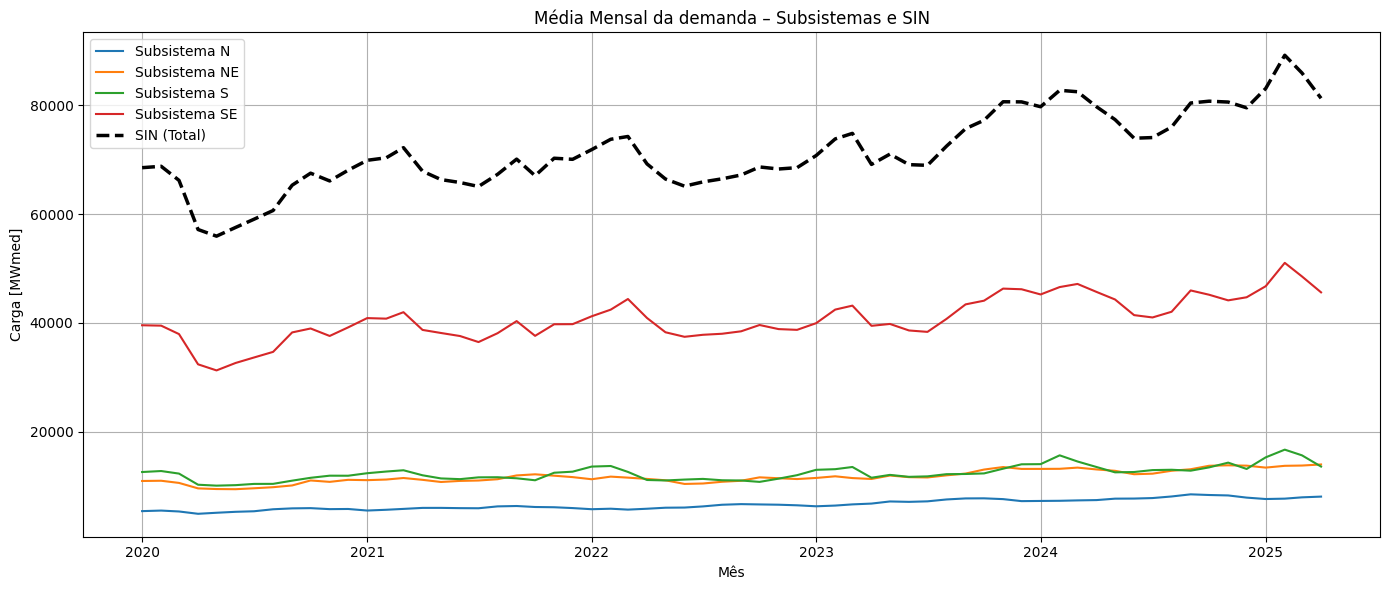

In [51]:
# Garantir tipos corretos
media_mensal["mes"] = pd.to_datetime(media_mensal["mes"])
media_mensal_sin["mes"] = pd.to_datetime(media_mensal_sin["mes"])

plt.figure(figsize=(14, 6))

# Plotar cada subsistema
for id_sub in media_mensal["id_subsistema"].unique():
    dados_sub = media_mensal[media_mensal["id_subsistema"] == id_sub]
    plt.plot(dados_sub["mes"], dados_sub["media_mensal"], label=f"Subsistema {id_sub}")

# Plotar linha do SIN
plt.plot(media_mensal_sin["mes"], media_mensal_sin["media_mensal_sin"],
         label="SIN (Total)", color="black", linewidth=2.5, linestyle="--")

# Personalização
plt.title("Média Mensal da demanda – Subsistemas e SIN")
plt.xlabel("Mês")
plt.ylabel("Carga [MWmed]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


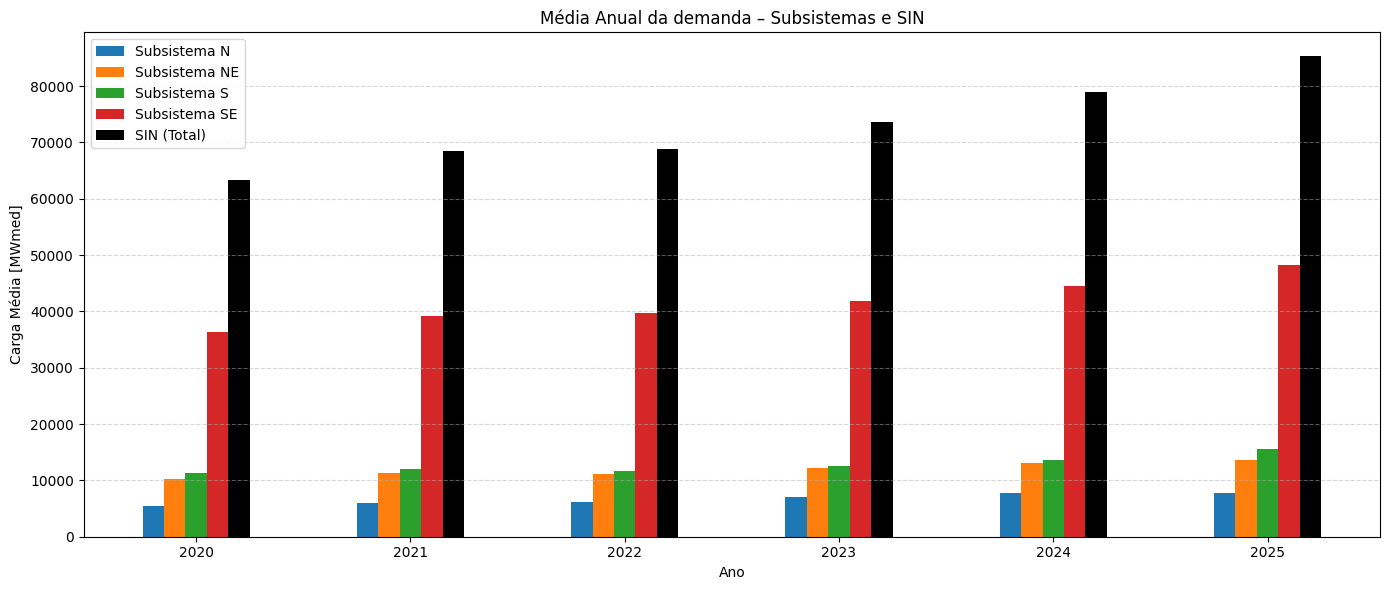

In [52]:
# Obter anos únicos
anos = sorted(media_anual["ano"].unique())
subsistemas = sorted(media_anual["id_subsistema"].unique())

# Largura de cada barra
bar_width = 0.1
posicoes = np.arange(len(anos))

plt.figure(figsize=(14, 6))

# Plotar barras para cada subsistema
for i, id_sub in enumerate(subsistemas):
    dados_sub = media_anual[media_anual["id_subsistema"] == id_sub]
    plt.bar(posicoes + i * bar_width, dados_sub["media_anual"], width=bar_width, label=f"Subsistema {id_sub}")

# Adicionar barras do SIN
plt.bar(posicoes + len(subsistemas) * bar_width, media_anual_sin["media_anual_sin"],
        width=bar_width, color="black", label="SIN (Total)")

# Ajustes do eixo x
plt.xticks(posicoes + (len(subsistemas) / 2) * bar_width, anos)
plt.xlabel("Ano")
plt.ylabel("Carga Média [MWmed]")
plt.title("Média Anual da demanda – Subsistemas e SIN")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [53]:
## Calcular sazonalidade da carga - considerando 2020 e 2021 - ano da pandemia

# calculo dos fatores 
media_anual = (
    demanda
    .groupby([demanda["din_instante"].dt.year, "id_subsistema"])["val_cargaenergiahomwmed"]
    .mean()
    .reset_index()
    .rename(columns={
        "din_instante": "ano",
        "val_cargaenergiahomwmed": "media_anual"
    })
)

# Extrair o ano das datas mensais
media_mensal["ano"] = media_mensal["mes"].dt.year

# Juntar com a média anual por subsistema
media_mensal_com_anual = pd.merge(
    media_mensal,
    media_anual,
    on=["ano", "id_subsistema"],
    how="left"
)

media_mensal_com_anual["fator_sazonal"] = (
    media_mensal_com_anual["media_mensal"] / media_mensal_com_anual["media_anual"]
)


# calculo da sazo

# Extrair o número do mês
media_mensal_com_anual["mes_num"] = media_mensal_com_anual["mes"].dt.month

# Calcular média dos fatores por mês e subsistema
fatores_sazonais = (
    media_mensal_com_anual
    .groupby(["mes_num", "id_subsistema"])["fator_sazonal"]
    .mean()
    .reset_index()
)

# Extrair ano
media_mensal_sin["ano"] = media_mensal_sin["mes"].dt.year

# Calcular média anual do SIN
media_anual_sin = (
    media_mensal_sin
    .groupby("ano")["media_mensal_sin"]
    .mean()
    .reset_index()
    .rename(columns={"media_mensal_sin": "media_anual_sin"})
)

# Juntar com dados mensais
media_mensal_sin_com_anual = pd.merge(
    media_mensal_sin,
    media_anual_sin,
    on="ano",
    how="left"
)

# Fator sazonal do SIN
media_mensal_sin_com_anual["mes_num"] = media_mensal_sin_com_anual["mes"].dt.month
media_mensal_sin_com_anual["fator_sazonal_sin"] = (
    media_mensal_sin_com_anual["media_mensal_sin"] / media_mensal_sin_com_anual["media_anual_sin"]
)

# Média por mês
fatores_sazonais_sin = (
    media_mensal_sin_com_anual
    .groupby("mes_num")["fator_sazonal_sin"]
    .mean()
    .reset_index()
)


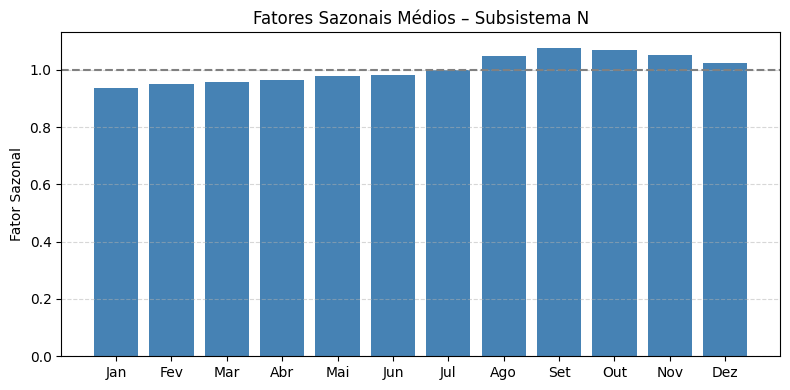

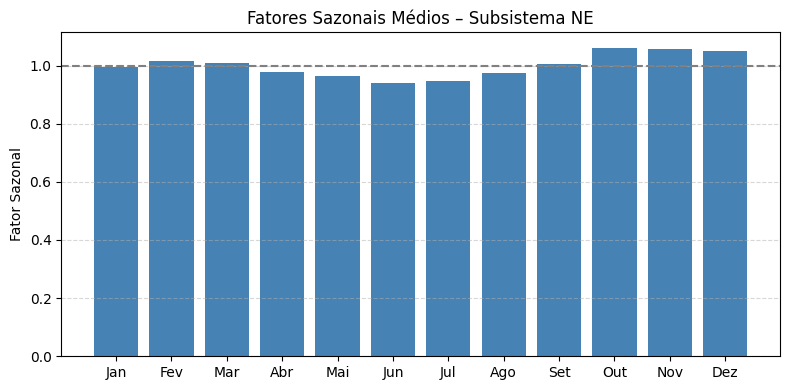

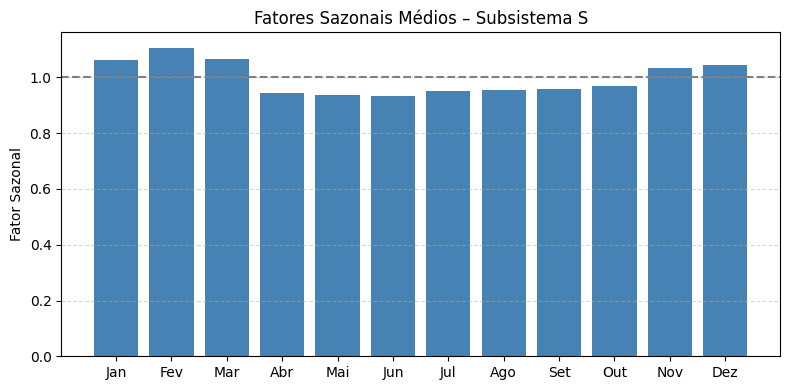

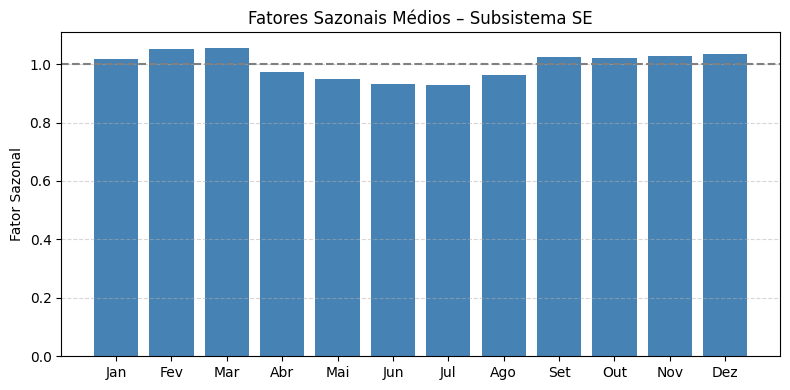

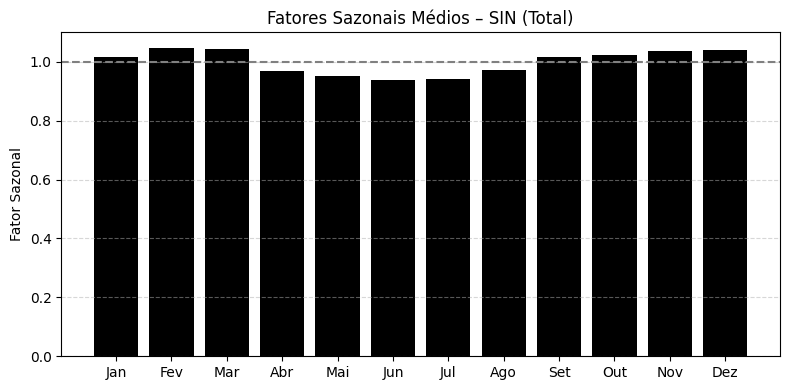

In [54]:
meses_nome = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", 
              "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

subsistemas = fatores_sazonais["id_subsistema"].unique()

# Gráfico por subsistema
for id_sub in subsistemas:
    dados = fatores_sazonais[fatores_sazonais["id_subsistema"] == id_sub]

    plt.figure(figsize=(8, 4))
    plt.bar(dados["mes_num"], dados["fator_sazonal"], color="steelblue")
    plt.xticks(ticks=range(1, 13), labels=meses_nome)
    plt.title(f"Fatores Sazonais Médios – Subsistema {id_sub}")
    plt.ylabel("Fator Sazonal")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.axhline(1.0, color="gray", linestyle="--")
    plt.tight_layout()
    plt.show()

# Gráfico para o SIN
plt.figure(figsize=(8, 4))
plt.bar(fatores_sazonais_sin["mes_num"], fatores_sazonais_sin["fator_sazonal_sin"], color="black")
plt.xticks(ticks=range(1, 13), labels=meses_nome)
plt.title("Fatores Sazonais Médios – SIN (Total)")
plt.ylabel("Fator Sazonal")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.axhline(1.0, color="gray", linestyle="--")
plt.tight_layout()
plt.show()


In [55]:
# Excluir 2020 e 2021 do dataframe original com médias mensais + anuais
media_mensal_filtrada = media_mensal_com_anual[~media_mensal_com_anual["ano"].isin([2020, 2021])]
media_mensal_sin_filtrada = media_mensal_sin_com_anual[~media_mensal_sin_com_anual["ano"].isin([2020, 2021])]

## Calcular sazo desconsiderando 2020 e 2021
# Subsistemas
fatores_sazonais_filtrados = (
    media_mensal_filtrada
    .groupby(["mes_num", "id_subsistema"])["fator_sazonal"]
    .mean()
    .reset_index()
)

# SIN
fatores_sazonais_sin_filtrados = (
    media_mensal_sin_filtrada
    .groupby("mes_num")["fator_sazonal_sin"]
    .mean()
    .reset_index()
)


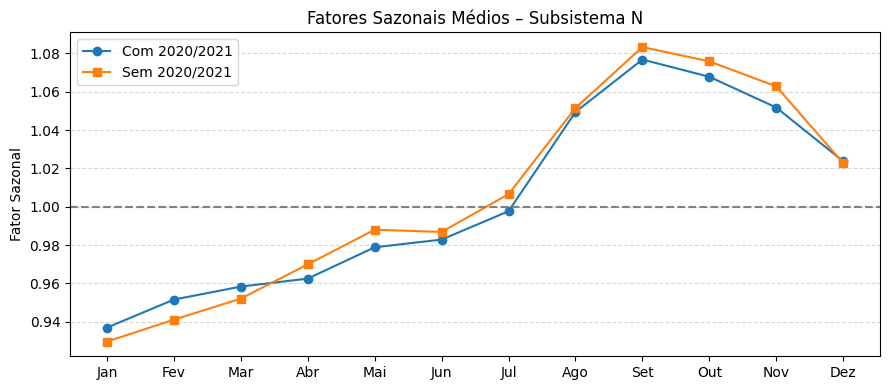

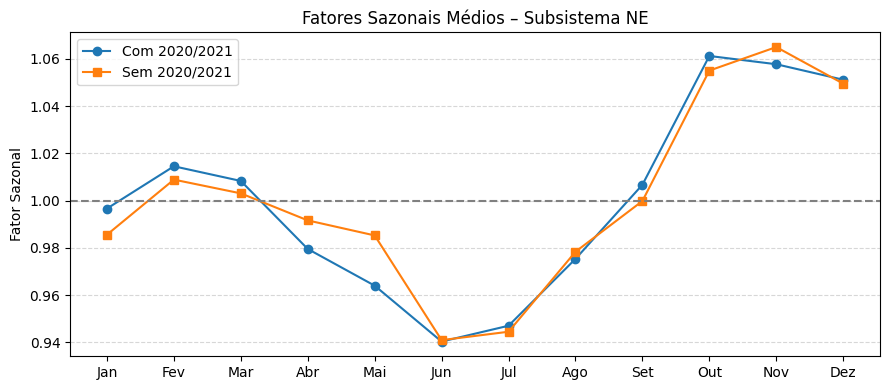

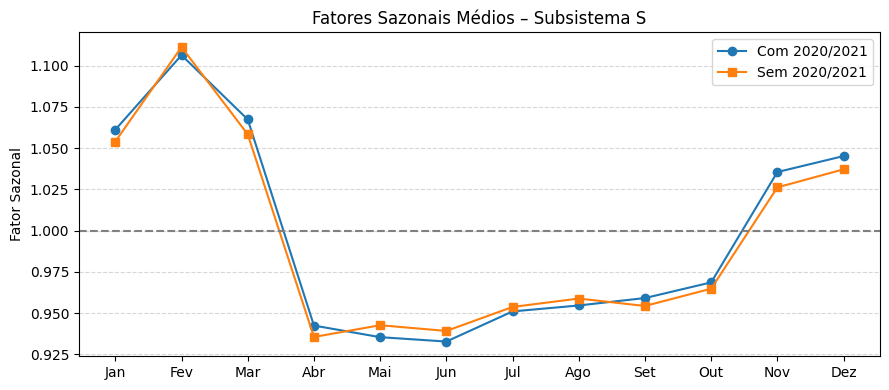

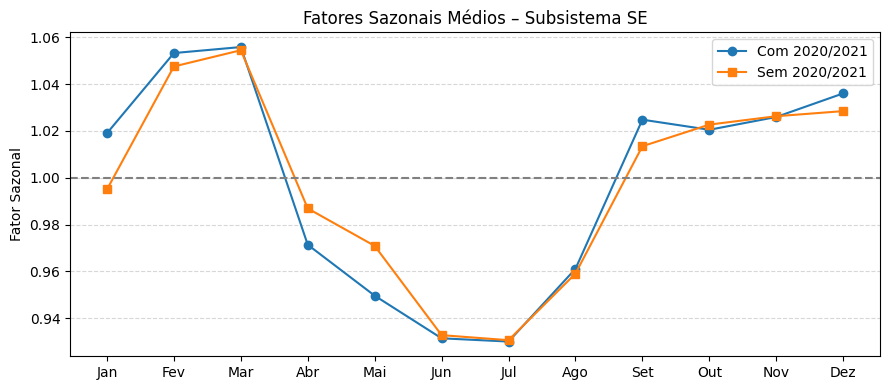

In [56]:
meses_nome = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", 
              "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

subsistemas = fatores_sazonais["id_subsistema"].unique()

for id_sub in subsistemas:
    dados_completo = fatores_sazonais[fatores_sazonais["id_subsistema"] == id_sub]
    dados_filtrado = fatores_sazonais_filtrados[fatores_sazonais_filtrados["id_subsistema"] == id_sub]

    plt.figure(figsize=(9, 4))
    plt.plot(dados_completo["mes_num"], dados_completo["fator_sazonal"], label="Com 2020/2021", marker="o")
    plt.plot(dados_filtrado["mes_num"], dados_filtrado["fator_sazonal"], label="Sem 2020/2021", marker="s")
    plt.axhline(1.0, color="gray", linestyle="--")
    plt.xticks(ticks=range(1, 13), labels=meses_nome)
    plt.title(f"Fatores Sazonais Médios – Subsistema {id_sub}")
    plt.ylabel("Fator Sazonal")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


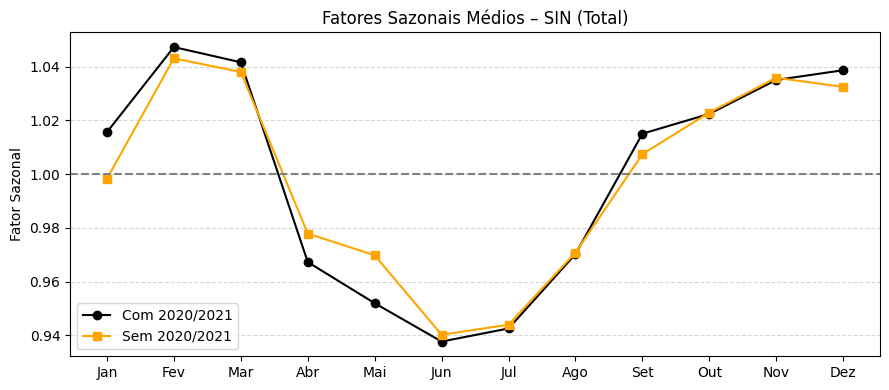

In [57]:
plt.figure(figsize=(9, 4))
plt.plot(fatores_sazonais_sin["mes_num"], fatores_sazonais_sin["fator_sazonal_sin"], label="Com 2020/2021", marker="o", color="black")
plt.plot(fatores_sazonais_sin_filtrados["mes_num"], fatores_sazonais_sin_filtrados["fator_sazonal_sin"], label="Sem 2020/2021", marker="s", color="orange")
plt.axhline(1.0, color="gray", linestyle="--")
plt.xticks(ticks=range(1, 13), labels=meses_nome)
plt.title("Fatores Sazonais Médios – SIN (Total)")
plt.ylabel("Fator Sazonal")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [58]:
## dados em forma de tabela

# Renomear colunas para facilitar o merge
sin_completo = fatores_sazonais_sin.rename(columns={"fator_sazonal_sin": "completo"})
sin_filtrado = fatores_sazonais_sin_filtrados.rename(columns={"fator_sazonal_sin": "filtrado"})

# Juntar os dois
comparacao_sin = pd.merge(sin_completo, sin_filtrado, on="mes_num")

# Calcular a diferença
comparacao_sin["diferenca"] = comparacao_sin["filtrado"] - comparacao_sin["completo"]

# Adicionar nome do mês
comparacao_sin["mes"] = comparacao_sin["mes_num"].map({
    1: "Jan", 2: "Fev", 3: "Mar", 4: "Abr", 5: "Mai", 6: "Jun",
    7: "Jul", 8: "Ago", 9: "Set", 10: "Out", 11: "Nov", 12: "Dez"
})

# Reorganizar colunas
comparacao_sin = comparacao_sin[["mes", "completo", "filtrado", "diferenca"]]

# Separar original e filtrado
subs_completo = fatores_sazonais.rename(columns={"fator_sazonal": "completo"})
subs_filtrado = fatores_sazonais_filtrados.rename(columns={"fator_sazonal": "filtrado"})

# Juntar
comparacao_subs = pd.merge(
    subs_completo,
    subs_filtrado,
    on=["mes_num", "id_subsistema"]
)

# Calcular diferença
comparacao_subs["diferenca"] = comparacao_subs["filtrado"] - comparacao_subs["completo"]

# Nome do mês
comparacao_subs["mes"] = comparacao_subs["mes_num"].map({
    1: "Jan", 2: "Fev", 3: "Mar", 4: "Abr", 5: "Mai", 6: "Jun",
    7: "Jul", 8: "Ago", 9: "Set", 10: "Out", 11: "Nov", 12: "Dez"
})

# Reordenar colunas
comparacao_subs = comparacao_subs[["id_subsistema", "mes", "completo", "filtrado", "diferenca"]]


In [59]:
# tabela N
subs_id = comparacao_subs["id_subsistema"].unique()[0]  # ou outro id que quiser
print(comparacao_subs[comparacao_subs["id_subsistema"] == subs_id].round(4))

   id_subsistema  mes  completo  filtrado  diferenca
0              N  Jan    0.9370    0.9297    -0.0073
4              N  Fev    0.9516    0.9411    -0.0105
8              N  Mar    0.9584    0.9521    -0.0063
12             N  Abr    0.9625    0.9700     0.0074
16             N  Mai    0.9789    0.9880     0.0092
20             N  Jun    0.9829    0.9869     0.0040
24             N  Jul    0.9977    1.0065     0.0089
28             N  Ago    1.0494    1.0515     0.0021
32             N  Set    1.0767    1.0832     0.0065
36             N  Out    1.0677    1.0758     0.0080
40             N  Nov    1.0517    1.0627     0.0110
44             N  Dez    1.0237    1.0227    -0.0010


In [60]:
# tabela NE
subs_id = comparacao_subs["id_subsistema"].unique()[1]  # ou outro id que quiser
print(comparacao_subs[comparacao_subs["id_subsistema"] == subs_id].round(4))


   id_subsistema  mes  completo  filtrado  diferenca
1             NE  Jan    0.9966    0.9856    -0.0111
5             NE  Fev    1.0146    1.0089    -0.0057
9             NE  Mar    1.0083    1.0031    -0.0053
13            NE  Abr    0.9795    0.9916     0.0121
17            NE  Mai    0.9640    0.9853     0.0213
21            NE  Jun    0.9403    0.9409     0.0006
25            NE  Jul    0.9470    0.9445    -0.0025
29            NE  Ago    0.9753    0.9783     0.0030
33            NE  Set    1.0067    0.9998    -0.0069
37            NE  Out    1.0613    1.0551    -0.0062
41            NE  Nov    1.0578    1.0651     0.0073
45            NE  Dez    1.0512    1.0496    -0.0016


In [61]:
# tabela S
subs_id = comparacao_subs["id_subsistema"].unique()[2]  # ou outro id que quiser
print(comparacao_subs[comparacao_subs["id_subsistema"] == subs_id].round(4))


   id_subsistema  mes  completo  filtrado  diferenca
2              S  Jan    1.0612    1.0540    -0.0072
6              S  Fev    1.1063    1.1112     0.0049
10             S  Mar    1.0674    1.0583    -0.0090
14             S  Abr    0.9424    0.9355    -0.0069
18             S  Mai    0.9354    0.9426     0.0072
22             S  Jun    0.9327    0.9392     0.0064
26             S  Jul    0.9510    0.9537     0.0027
30             S  Ago    0.9546    0.9588     0.0042
34             S  Set    0.9591    0.9543    -0.0048
38             S  Out    0.9686    0.9648    -0.0038
42             S  Nov    1.0355    1.0262    -0.0093
46             S  Dez    1.0452    1.0371    -0.0081


In [62]:
# tabela SE
subs_id = comparacao_subs["id_subsistema"].unique()[3]  # ou outro id que quiser
print(comparacao_subs[comparacao_subs["id_subsistema"] == subs_id].round(4))

### OU SEJA, a pandemia tem pouco efeito para SAZO

   id_subsistema  mes  completo  filtrado  diferenca
3             SE  Jan    1.0190    0.9950    -0.0240
7             SE  Fev    1.0532    1.0475    -0.0057
11            SE  Mar    1.0558    1.0544    -0.0014
15            SE  Abr    0.9714    0.9869     0.0155
19            SE  Mai    0.9496    0.9709     0.0213
23            SE  Jun    0.9314    0.9328     0.0013
27            SE  Jul    0.9301    0.9306     0.0006
31            SE  Ago    0.9611    0.9591    -0.0020
35            SE  Set    1.0248    1.0135    -0.0113
39            SE  Out    1.0205    1.0227     0.0022
43            SE  Nov    1.0259    1.0263     0.0003
47            SE  Dez    1.0360    1.0284    -0.0076


In [63]:
print(comparacao_sin.round(4))

    mes  completo  filtrado  diferenca
0   Jan    1.0156    0.9983    -0.0173
1   Fev    1.0473    1.0431    -0.0042
2   Mar    1.0416    1.0380    -0.0036
3   Abr    0.9673    0.9779     0.0106
4   Mai    0.9520    0.9698     0.0178
5   Jun    0.9377    0.9402     0.0025
6   Jul    0.9426    0.9440     0.0014
7   Ago    0.9703    0.9708     0.0006
8   Set    1.0151    1.0074    -0.0076
9   Out    1.0224    1.0229     0.0005
10  Nov    1.0351    1.0359     0.0008
11  Dez    1.0387    1.0325    -0.0062
